<a href="https://colab.research.google.com/github/aayRJ23/Heart-Disease-Prediction/blob/main/HeartDiseasePredictionwb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection And Processing

In [ ]:
#loading the csv data to a Pandas DataFrame
df =pd.read_csv('./newData.csv')

In [ ]:
#print first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,This is Female,1,130,204,0,0,202,0,0.0,2,0,2,Yes
1,34,This is Female,3,118,182,0,0,174,0,0.0,2,0,2,Yes
2,34,This is Male,1,118,210,0,1,192,0,0.7,2,0,2,Yes
3,35,This is Female,1,122,192,0,1,174,0,0.0,2,0,2,Yes
4,35,This is Male,0,138,183,0,1,182,0,1.4,2,0,2,Yes


In [ ]:
# print last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,71,This is Male,1,160,302,0,1,162,0,0.4,2,2,2,Yes
299,71,This is Male,0,112,149,0,1,125,0,1.6,1,0,2,Yes
300,74,This is Male,1,120,269,0,0,121,1,0.2,2,1,2,Yes
301,76,This is Male,2,140,197,0,2,116,0,1.1,1,0,2,Yes
302,77,This is Female,0,125,304,0,0,162,1,0.0,2,3,2,No


In [ ]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


1 --> Defective Heart &
0 --> Healthy Heart

Splitting the Features and Target .
Features refers to the all attributes other than the target(result).
As in the given dataset , All both features and target are combined , So we need to spilt them.


<Axes: xlabel='target', ylabel='count'>

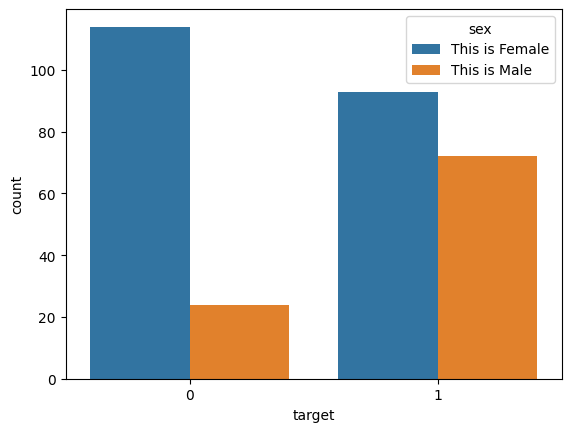

In [ ]:
# Section 1 - Plotting
sns.countplot(data=df,x='target',hue='sex')

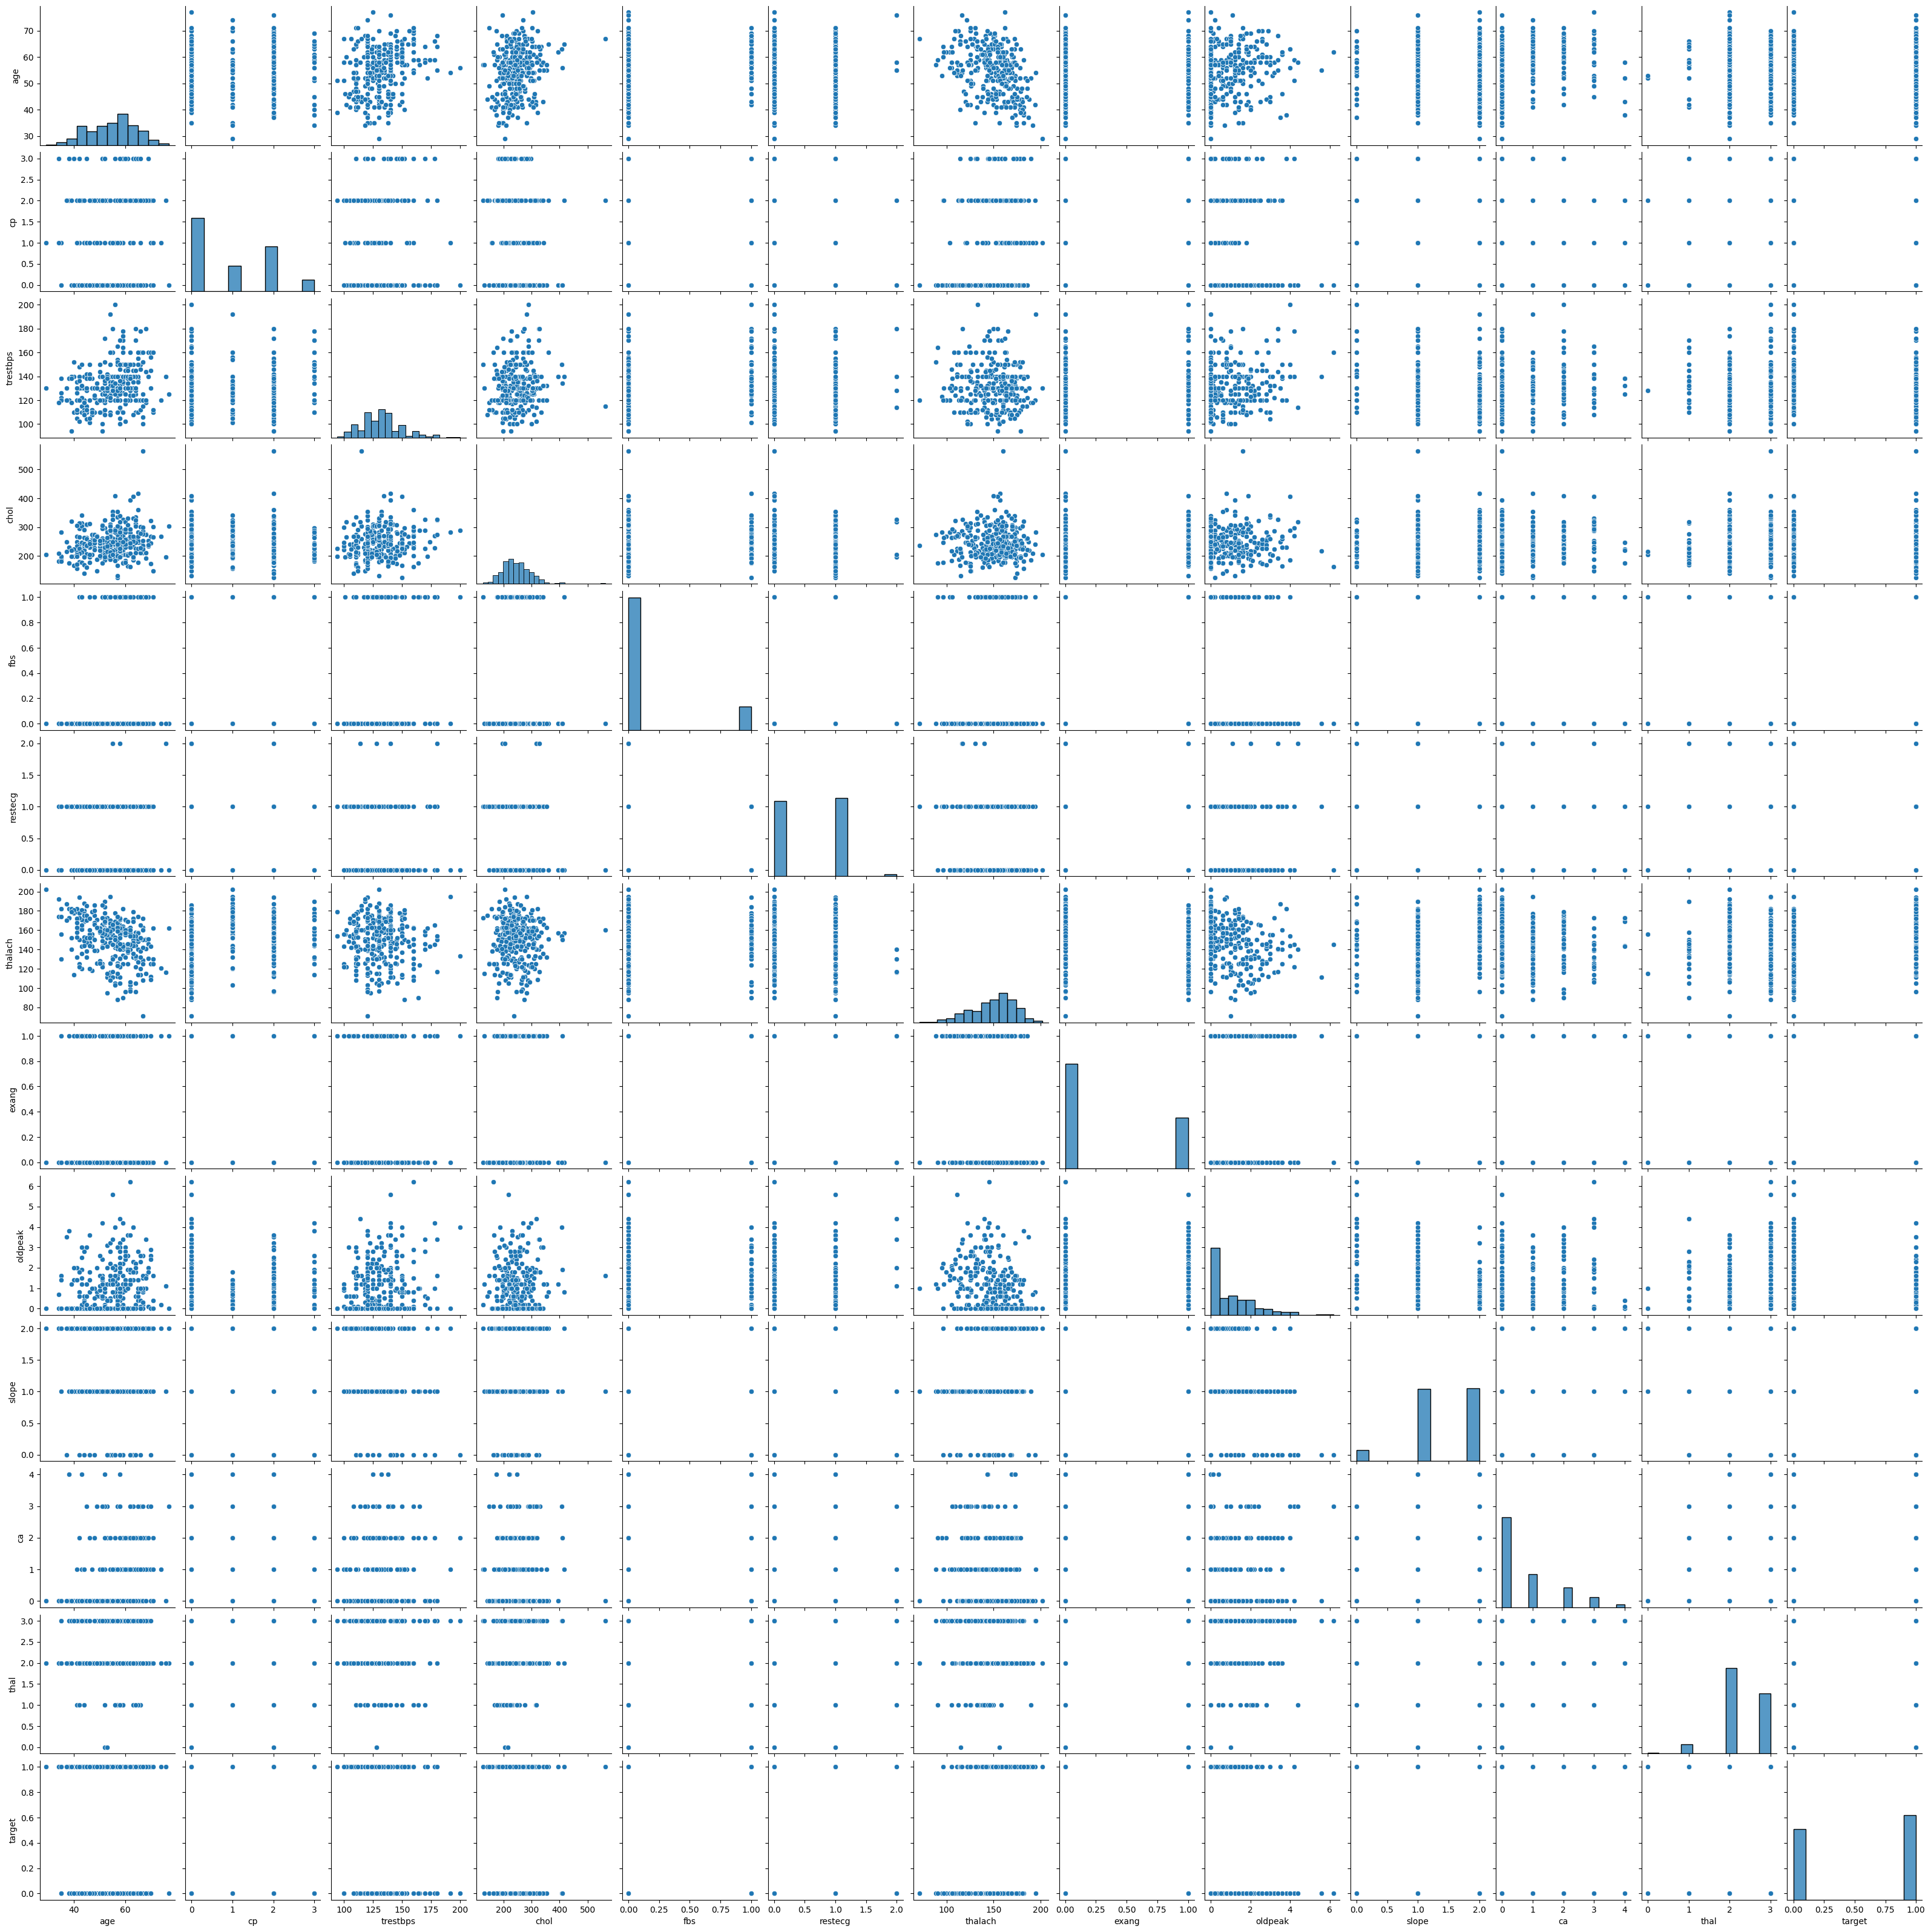

In [ ]:
sns.pairplot(data=df)

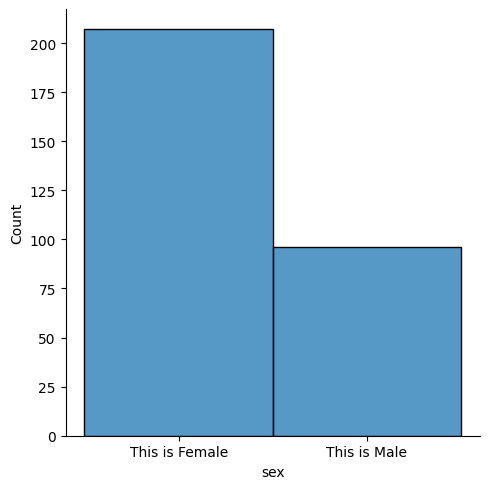

In [ ]:
sns.displot(df['sex'])

In [ ]:
df.corr()

<ipython-input-66-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764


<ipython-input-65-8001899daae3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f" , annot_kws={"color": "black" , "size": 8 } , cmap="coolwarm" )


<Axes: >

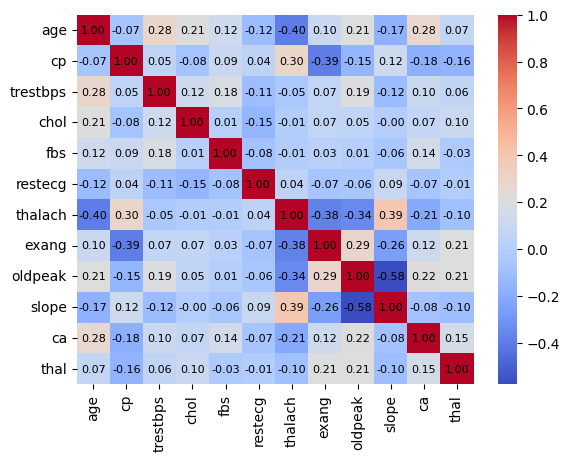

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f" , annot_kws={"color": "black" , "size": 8 } , cmap="coolwarm" )

In [ ]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [ ]:
X = df[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

0.9450928919200094


In [ ]:
prediction = lm.predict(X_test)

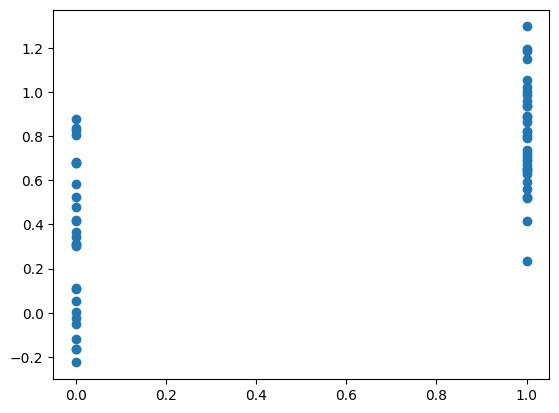

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test,prediction)

0.14614103089448724

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

0.38228396630579115

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lm = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe.score(X_test, y_test)

0.8032786885245902

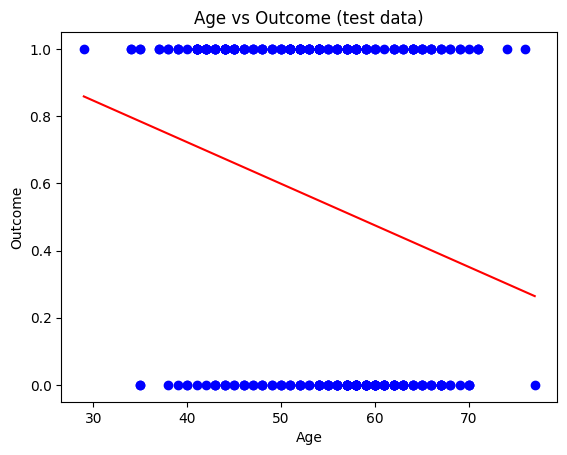

In [ ]:
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.title("Age vs Outcome (test data)")

m, b = np.polyfit(df['age'], df['target'], 1)
plt.plot(df['age'],  df['target'], 'bo', df['age'], m*df['age']+b, '-r')

plt.show()

In [ ]:
print(df['age'])

0      29
1      34
2      34
3      35
4      35
       ..
298    71
299    71
300    74
301    76
302    77
Name: age, Length: 303, dtype: int64


In [ ]:
print(df['target'])

0      1
1      1
2      1
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
document = '''At five o'clock in the morning I went to railway station near by my home.
              I'll never go to that railway station again.
              '''
print(document)

At five o'clock in the morning I went to railway station near by my home.
              I'll never go to that railway station again.
              


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
words = nltk.word_tokenize(document)
print(words)

['At', 'five', "o'clock", 'in', 'the', 'morning', 'I', 'went', 'to', 'railway', 'station', 'near', 'by', 'my', 'home', '.', 'I', "'ll", 'never', 'go', 'to', 'that', 'railway', 'station', 'again', '.']


In [ ]:
sentences = nltk.sent_tokenize(document)
print(sentences)

["At five o'clock in the morning I went to railway station near by my home.", "I'll never go to that railway station again."]


Lets do tokenization


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load your dataset

In [ ]:
newDataSet= pd.read_csv('./newData.csv')
df = pd.DataFrame(newDataSet)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,This is Female,1,130,204,0,0,202,0,0.0,2,0,2,Yes
1,34,This is Female,3,118,182,0,0,174,0,0.0,2,0,2,Yes
2,34,This is Male,1,118,210,0,1,192,0,0.7,2,0,2,Yes
3,35,This is Female,1,122,192,0,1,174,0,0.0,2,0,2,Yes
4,35,This is Male,0,138,183,0,1,182,0,1.4,2,0,2,Yes


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,71,This is Male,1,160,302,0,1,162,0,0.4,2,2,2,Yes
299,71,This is Male,0,112,149,0,1,125,0,1.6,1,0,2,Yes
300,74,This is Male,1,120,269,0,0,121,1,0.2,2,1,2,Yes
301,76,This is Male,2,140,197,0,2,116,0,1.1,1,0,2,Yes
302,77,This is Female,0,125,304,0,0,162,1,0.0,2,3,2,No


What is Tokeinzation ? Just see the demonstration

In [ ]:
word_tokenize("This is a boy")

['This', 'is', 'a', 'boy']

*Extract the gender column data from the dataset*

In [ ]:
df['sex'] = df['sex'].apply(lambda x: word_tokenize(x)[2])

In [ ]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,Yes
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,Yes
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,Yes
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,Yes
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,Yes


In [ ]:
df['target'] = df['target'].map({'No': 0, 'Yes': 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [ ]:
import nltk, re, string, collections
from nltk.util import ngrams
with open("./ngramdemo.rtf", "r", encoding='latin-1') as file:
    text = file.read()
text[0:1000]

FileNotFoundError: [Errno 2] No such file or directory: './ngramdemo.rtf'

In [ ]:
text = re.sub('<.*>','',text)
text = re.sub('ENDOFARTICLE.','',text)
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]"
text = re.sub(punctuationNoPeriod, "", text)
text[0:1000]

'\\rtf1\\ansi\\ansicpg1252\\cocoartf2759\n\\cocoatextscaling0\\cocoaplatform0\\fonttbl\\f0\\fswiss\\fcharset0 Helvetica\n\\colortbl\\red255\\green255\\blue255\n\\\\expandedcolortbl\n\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0\n\\pard\\tx720\\tx1440\\tx2160\\tx2880\\tx3600\\tx4320\\tx5040\\tx5760\\tx6480\\tx7200\\tx7920\\tx8640\\pardirnatural\\partightenfactor0\n\n\\f0\\fs24 \\cf0 Space exploration has long captured the imagination of humanity serving as a testament to our innate curiosity and desire to explore the unknown From the earliest observations of the night sky by ancient civilizations to the modernday missions to distant planets and galaxies space exploration has evolved into one of the most profound endeavors of human history Its significance transcends scientific discovery encompassing technological innovation international collaboration and the inspiration of future generations\\\nThe history of space exploration is marked by key miles

In [ ]:
tokenized = text.split()
esBigrams = ngrams(tokenized, 2)

In [ ]:
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(10)

[(('space', 'exploration'), 9),
 (('of', 'the'), 7),
 (('of', 'space'), 5),
 (('exploration', 'has'), 3),
 (('to', 'the'), 3),
 (('technological', 'innovation'), 3),
 (('Space', 'exploration'), 2),
 (('of', 'humanity'), 2),
 (('as', 'a'), 2),
 (('to', 'explore'), 2)]

Lets Implement Decision Tree

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
299,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
300,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
301,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Explanation of each attribute


1. **age**: This attribute represents the age of the individual.

2. **sex**: This attribute represents the gender of the individual. It's a binary attribute where:
   - 0: Female
   - 1: Male

3. **cp**: This attribute represents the type of chest pain experienced by the individual. It may have different categories such as:
   - typical angina
   - atypical angina
   - non-anginal pain
   - asymptomatic

4. **trestbps**: This attribute represents the resting blood pressure of the individual (in mm Hg).

5. **chol**: This attribute represents the serum cholesterol level of the individual (in mg/dl).

6. **fbs**: This attribute represents the fasting blood sugar level of the individual. It's a binary attribute where:
   - 0: Fasting blood sugar < 120 mg/dl
   - 1: Fasting blood sugar > 120 mg/dl

7. **restecg**: This attribute represents the resting electrocardiographic results. It may have different categories such as:
   - normal
   - ST-T wave abnormality
   - hypertrophy

8. **thalach**: This attribute represents the maximum heart rate achieved by the individual.

9. **exang**: This attribute represents whether the individual experiences exercise-induced angina. It's a binary attribute where:
   - 0: No
   - 1: Yes

10. **oldpeak**: This attribute represents the ST depression induced by exercise relative to rest.

11. **slope**: This attribute represents the slope of the peak exercise ST segment. It may have different categories such as:
    - upsloping
    - flat
    - downsloping

12. **ca**: This attribute represents the number of major vessels (0-3) colored by fluoroscopy.

13. **thal**: This attribute represents thalassemia, which may have different categories such as:
    - normal
    - fixed defect
    - reversible defect

14. **target**: This attribute represents the presence of heart disease:
    - 0: No heart disease
    - 1: Heart disease present

Since , initially , all the attributes are containing either numerical values or boolean values . So firstly we have to convert all these values into categories , bases on their properties or ranges


1. **Age**:
   - Young: Below 40 years
   - Middle-aged: 40-60 years
   - Senior: Above 60 years

2. **Sex**:
   - Female : 1
   - Male : 0

3. **Chest Pain Type (cp)**:
   - Typical Angina : 0
   - Atypical Angina : 1
   - Non-Anginal Pain :2
   - Asymptomatic : 3

4. **Resting Blood Pressure (trestbps)**:
   - Low: Below 120 mm Hg
   - Normal: 120-140 mm Hg
   - High: Above 140 mm Hg

5. **Serum Cholesterol (chol)**:
   - Normal: Below 200 mg/dl
   - Borderline High: 200-240 mg/dl
   - High: Above 240 mg/dl

6. **Fasting Blood Sugar (fbs)**:
   - Normal: Fasting blood sugar < 120 mg/dl
   - High: Fasting blood sugar > 120 mg/dl

7. **Resting Electrocardiographic Results (restecg)**:
   - Normal : 0
   - ST-T Wave Abnormality : 1
   - Hypertrophy : 2

8. **Maximum Heart Rate Achieved (thalach)**:
   - Low: Below 100 bpm
   - Normal: 100-150 bpm
   - High: Above 150 bpm

9. **Exercise Induced Angina (exang)**:
   - No
   - Yes

10. **Oldpeak (ST Depression)**:
    - Low: Below 1 mm
    - Medium: 1-2 mm
    - High: Above 2 mm

11. **Slope of the Peak Exercise ST Segment (slope)**:
    - Upsloping : 0
    - Flat : 1
    - Downsloping : 2

12. **Number of Major Vessels Colored by Fluoroscopy (ca)**:
    - 0
    - 1
    - 2
    - 3

13. **Thalassemia (thal)**:
    - Normal : 0
    - Fixed Defect : 1
    - Reversible Defect : 2
  
14. **target **:
    - Disease Absent : 0
    - Disease Present : 1

In [ ]:
import pandas as pd

Now categorizing the each attribute , because it was containing numerical at starting

In [ ]:

# Replace values for Age
df['age'] = pd.cut(df['age'], bins=[0, 40, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Replace values for Sex
df['sex'] = df['sex'].map({0: 'Male', 1: 'Female'})

# Replace values for Chest Pain Type (cp)
cp_mapping = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

# Replace values for Resting Blood Pressure (trestbps)
df['trestbps'] = pd.cut(df['trestbps'], bins=[0, 120, 140, float('inf')], labels=['Low', 'Normal', 'High'])

# Replace values for Serum Cholesterol (chol)
df['chol'] = pd.cut(df['chol'], bins=[0, 200, 240, float('inf')], labels=['Normal', 'Borderline High', 'High'])

# Replace values for Fasting Blood Sugar (fbs)
df['fbs'] = df['fbs'].map({0: 'Normal', 1: 'High'})

# Replace values for Resting Electrocardiographic Results (restecg)
df['restecg'] = df['restecg'].map({0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Hypertrophy'})

# Replace values for Maximum Heart Rate Achieved (thalach)
df['thalach'] = pd.cut(df['thalach'], bins=[0, 100, 150, float('inf')], labels=['Low', 'Normal', 'High'])

# Replace values for Exercise Induced Angina (exang)
df['exang'] = df['exang'].map({0: 'No', 1: 'Yes'})

# Replace values for Oldpeak (ST Depression)
df['oldpeak'] = pd.cut(df['oldpeak'], bins=[-float('inf'), 1, 2, float('inf')], labels=['Low', 'Medium', 'High'])

# Replace values for Slope of the Peak Exercise ST Segment (slope)
df['slope'] = df['slope'].map({0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})

# Replace values for Number of Major Vessels Colored by Fluoroscopy (ca)
# No changes needed as it's already categorical

# Replace values for Thalassemia (thal)
df['thal'] = df['thal'].map({0: 'Normal', 1: 'Fixed Defect', 2: 'Reversible Defect'})

# Replace values for target
df['target'] = df['target'].map({0: 'Disease Absent', 1: 'Disease Present'})


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Senior,Female,Asymptomatic,High,Borderline High,High,Normal,Normal,No,High,Upsloping,0,Fixed Defect,Disease Present
1,Young,Female,Non-Anginal Pain,Normal,High,Normal,ST-T Wave Abnormality,High,No,High,Upsloping,0,Reversible Defect,Disease Present
2,Middle-aged,Male,Atypical Angina,Normal,Borderline High,Normal,Normal,High,No,Medium,Downsloping,0,Reversible Defect,Disease Present
3,Middle-aged,Female,Atypical Angina,Low,Borderline High,Normal,ST-T Wave Abnormality,High,No,Low,Downsloping,0,Reversible Defect,Disease Present
4,Middle-aged,Male,Typical Angina,Low,High,Normal,ST-T Wave Abnormality,High,Yes,Low,Downsloping,0,Reversible Defect,Disease Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Middle-aged,Male,Typical Angina,Normal,High,Normal,ST-T Wave Abnormality,Normal,Yes,Low,Flat,0,NaN,Disease Absent
299,Middle-aged,Female,Asymptomatic,Low,High,Normal,ST-T Wave Abnormality,Normal,No,Medium,Flat,0,NaN,Disease Absent
300,Senior,Female,Typical Angina,High,Normal,High,ST-T Wave Abnormality,Normal,No,High,Flat,2,NaN,Disease Absent
301,Middle-aged,Female,Typical Angina,Normal,Normal,Normal,ST-T Wave Abnormality,Normal,Yes,Medium,Flat,1,NaN,Disease Absent


Now as We can see that , the whole data has been converted into textual classes . So now Lets Implement the Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Senior,Female,Asymptomatic,High,Borderline High,High,Normal,Normal,No,High,Upsloping,0,Fixed Defect,Disease Present
1,Young,Female,Non-Anginal Pain,Normal,High,Normal,ST-T Wave Abnormality,High,No,High,Upsloping,0,Reversible Defect,Disease Present
2,Middle-aged,Male,Atypical Angina,Normal,Borderline High,Normal,Normal,High,No,Medium,Downsloping,0,Reversible Defect,Disease Present
3,Middle-aged,Female,Atypical Angina,Low,Borderline High,Normal,ST-T Wave Abnormality,High,No,Low,Downsloping,0,Reversible Defect,Disease Present
4,Middle-aged,Male,Typical Angina,Low,High,Normal,ST-T Wave Abnormality,High,Yes,Low,Downsloping,0,Reversible Defect,Disease Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Middle-aged,Male,Typical Angina,Normal,High,Normal,ST-T Wave Abnormality,Normal,Yes,Low,Flat,0,NaN,Disease Absent
299,Middle-aged,Female,Asymptomatic,Low,High,Normal,ST-T Wave Abnormality,Normal,No,Medium,Flat,0,NaN,Disease Absent
300,Senior,Female,Typical Angina,High,Normal,High,ST-T Wave Abnormality,Normal,No,High,Flat,2,NaN,Disease Absent
301,Middle-aged,Female,Typical Angina,Normal,Normal,Normal,ST-T Wave Abnormality,Normal,Yes,Medium,Flat,1,NaN,Disease Absent


In [ ]:
df['sex'].replace({'male':0, 'female':1} , inplace=True)

In [ ]:
X = pd.get_dummies(df.drop('target', axis=1))
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(  max_depth=4)

In [ ]:
# Fit the model
clf.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=4)

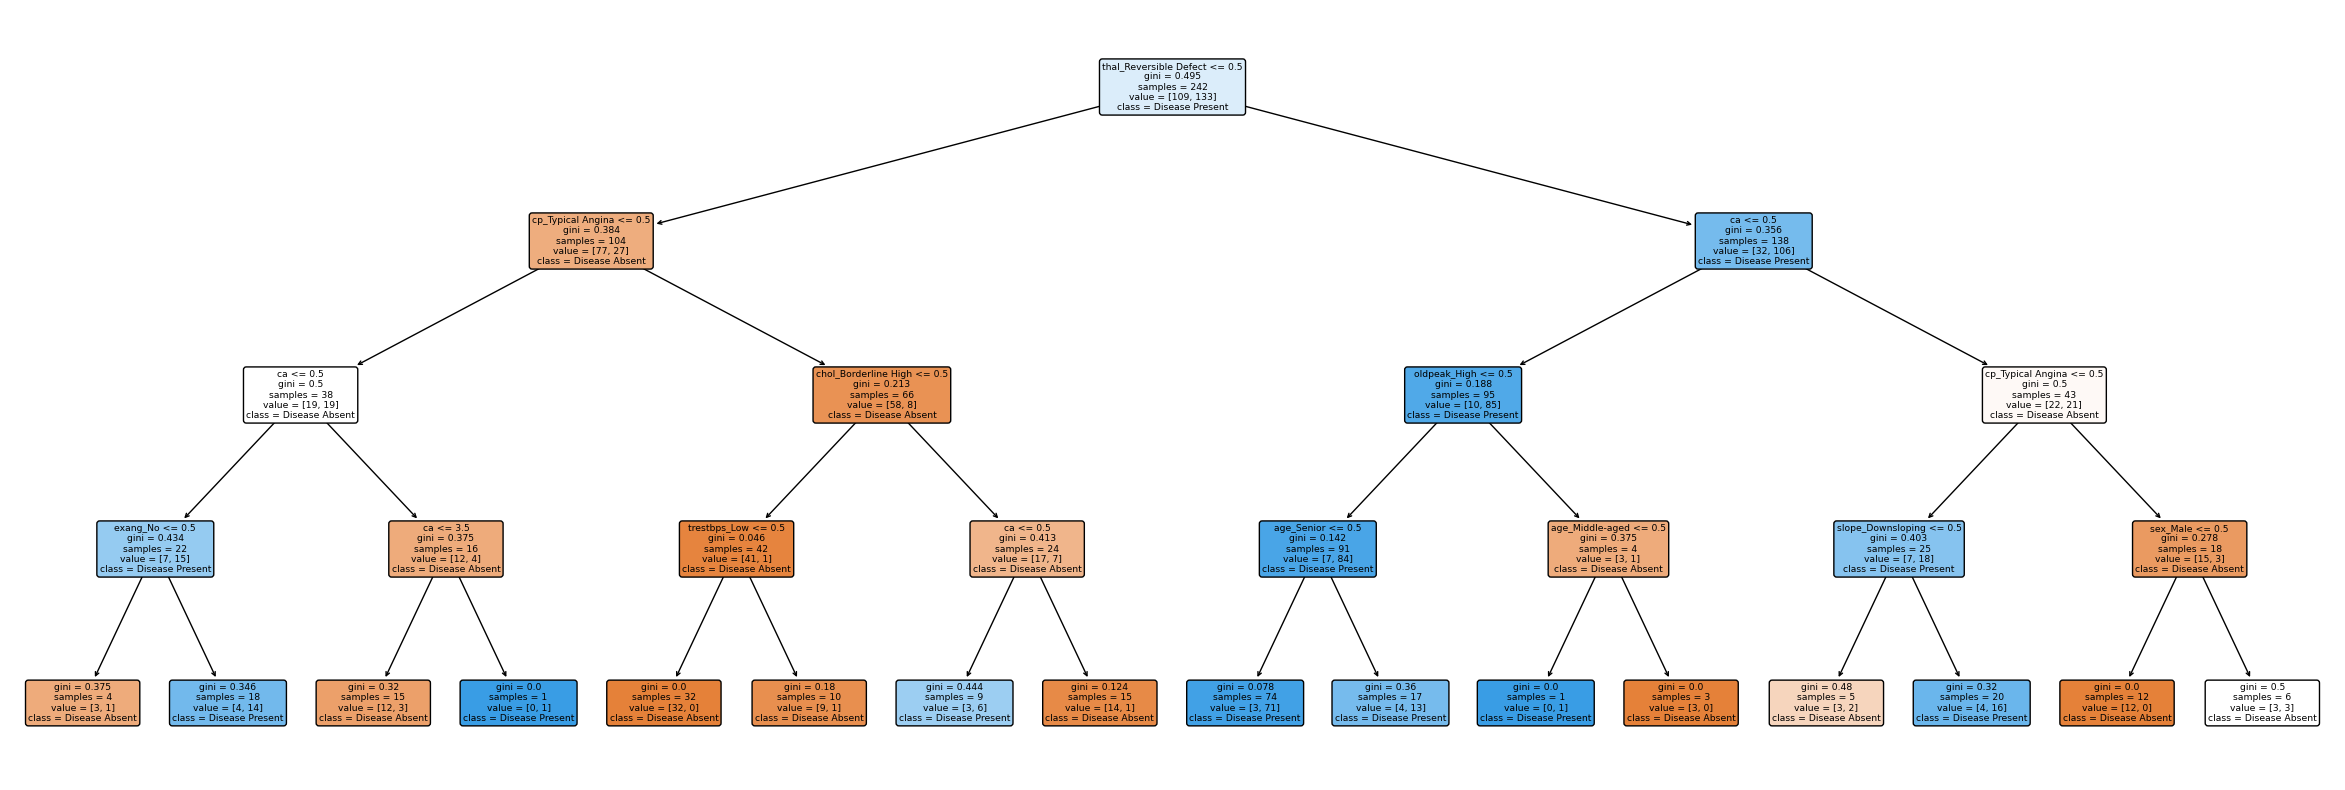

In [ ]:
# Plot the decision tree
plt.figure(figsize=(30, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Disease Absent', 'Disease Present'], filled=True, rounded=True)
plt.show()